In [ ]:
! pip install matplotlib
! pip install seaborn
! pip install thefuzz

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Loading Raw Datas from csv files

Digikala datas

In [6]:
dg_kala_apple_df_r = pd.read_csv('./digikala/apple_data.csv', index_col=0)
dg_kala_samsung_df_r = pd.read_csv('./digikala/samsung_data.csv', index_col=0)
dg_kala_xiaomi_df_r = pd.read_csv('./digikala/xiaomi_data.csv', index_col=0)

gooshi_online_apple_df_r = pd.read_csv('./gooshi_online/apple.csv', index_col=0)
gooshi_online_samsung_df_r = pd.read_csv('./gooshi_online/samsung.csv', index_col=0)
gooshi_online_xiaomi_df_r = pd.read_csv('./gooshi_online/xiaomi.csv', index_col=0)

meghdadit_apple_df_r = pd.read_csv('./meghdadit/apple_phones.csv', index_col=0)
meghdadit_xiaomi_df_r = pd.read_csv('./meghdadit/xiaomi_phones.csv', index_col=0)
meghdadit_samsung_df_r = pd.read_csv('./meghdadit/samsung_phones.csv', index_col=0)

technolife_apple_df_r = pd.read_csv('./technolife/apple_technolife.csv', index_col=0)
technolife_xiaomi_df_r = pd.read_csv('./technolife/xiaomi_technolife.csv', index_col=0)
technolife_samsung_df_r = pd.read_csv('./technolife/samsung_technolife.csv', index_col=0)

# Data cleaning

In [32]:
import re
from unidecode import unidecode

In [33]:
def data_cleaner(input_string):
    # replacing persian datas
    input_string = input_string.lower()

    if "iphone" not in input_string:
        input_string = input_string.replace("آیفون", "iphone")
    if "samsung" in input_string:
        input_string = input_string.replace("samsung", "")
    if "galaxy" not in input_string:
        input_string = input_string.replace("گلکسی", "galaxy")
    if "poko" not in input_string:
        input_string = input_string.replace("پوکو", "poko")
    if "xiaomi" not in input_string:
        input_string = input_string.replace("شیائومی", "xiaomi")
    
    if "(jhny)" in input_string:
        input_string = input_string.replace("(jhny)", "")
    
    input_string = input_string.replace("  ", " ")
    input_string = input_string.replace("-", " ")
    
    # Define a regular expression pattern to match Persian words
    persian_pattern = r'[\u0600-\u06FF]+'
    
    # Use the re.sub() function to replace Persian words with an empty string
    cleaned_string = re.sub(persian_pattern, '', input_string)
    
    return cleaned_string.lower()

In [34]:
def add_xiaomi(input_string):
    input_string = input_string.lower()
    if "xiaomi" not in input_string:
        return "xiaomi " + input_string
    else:
        return input_string

def add_iphone(input_string):
    input_string = input_string.lower()
    if "iphone" not in input_string:
        return "iphone " + input_string
    else:
        return input_string

In [35]:
def convert_ram(input_string):
    persian_to_english = {
        "یک":"1",
        "دو":"2",
        "سه":"3",
        "چهار":"4",
        "پنج":"5",
        "شش":"6",
        "هفت":"7",
        "هشت":"8",
        "نه":"9"
    }
    # Replace Persian number words with English numeric values
    for persian, english in persian_to_english.items():
        input_string = input_string.replace(persian, english)
    
    input_string = input_string.replace("گیگابایت", "")

    return unidecode(input_string)


apply functions

In [36]:
# dg kala data cleaning
dg_kala_apple_df_r["model"] = dg_kala_apple_df_r["model"].apply(data_cleaner)
dg_kala_apple_df_r["model"] = dg_kala_apple_df_r["model"].apply(add_iphone)
dg_kala_apple_df_r["ram"] = dg_kala_apple_df_r["ram"].apply(convert_ram)
dg_kala_samsung_df_r["model"] = dg_kala_samsung_df_r["model"].apply(data_cleaner)
dg_kala_samsung_df_r["ram"] = dg_kala_samsung_df_r["ram"].apply(convert_ram)
dg_kala_xiaomi_df_r["model"] = dg_kala_xiaomi_df_r["model"].apply(data_cleaner)
dg_kala_xiaomi_df_r["model"] = dg_kala_xiaomi_df_r["model"].apply(add_xiaomi)
dg_kala_xiaomi_df_r["ram"] = dg_kala_xiaomi_df_r["ram"].apply(convert_ram)

# gooshi online cleaning
gooshi_online_apple_df_r["phone"] = gooshi_online_apple_df_r["phone"].apply(data_cleaner)
gooshi_online_apple_df_r["phone"] = gooshi_online_apple_df_r["phone"].apply(add_iphone)
gooshi_online_samsung_df_r["phone"] = gooshi_online_samsung_df_r["phone"].apply(data_cleaner)
gooshi_online_xiaomi_df_r["phone"] = gooshi_online_xiaomi_df_r["phone"].apply(data_cleaner)
gooshi_online_xiaomi_df_r["phone"] = gooshi_online_xiaomi_df_r["phone"].apply(add_xiaomi)

# meghdad it data cleaning
meghdadit_apple_df_r["model"] = meghdadit_apple_df_r["model"].apply(data_cleaner)
meghdadit_apple_df_r["model"] = meghdadit_apple_df_r["model"].apply(add_iphone)
meghdadit_samsung_df_r["model"] = meghdadit_samsung_df_r["model"].apply(data_cleaner)
meghdadit_xiaomi_df_r["model"] = meghdadit_xiaomi_df_r["model"].apply(data_cleaner)
meghdadit_xiaomi_df_r["model"] = meghdadit_xiaomi_df_r["model"].apply(add_xiaomi)

# Technolife data cleaning
technolife_apple_df_r["Title"] = technolife_apple_df_r["Title"].apply(data_cleaner)
technolife_apple_df_r["Title"] = technolife_apple_df_r["Title"].apply(add_iphone)
technolife_samsung_df_r["Title"] = technolife_samsung_df_r["Title"].apply(data_cleaner)
technolife_xiaomi_df_r["Title"] = technolife_xiaomi_df_r["Title"].apply(data_cleaner)
technolife_xiaomi_df_r["Title"] = technolife_xiaomi_df_r["Title"].apply(add_xiaomi)

# Data formating

In [321]:
# Set float formatting to display decimals normally
pd.options.display.float_format = '{:.0f}'.format

In [322]:
dg_kala_apple_df = pd.DataFrame(columns=["model", "storage", "ram", "price"])
dg_kala_samsung_df = pd.DataFrame(columns=["model", "storage", "ram", "price"])
dg_kala_xiaomi_df = pd.DataFrame(columns=["model", "storage", "ram", "price"])

dg_kala_apple_df = dg_kala_apple_df_r[["model", "storage", "ram", "price"]].copy()
dg_kala_samsung_df = dg_kala_samsung_df_r[["model", "storage", "ram", "price"]].copy()
dg_kala_xiaomi_df = dg_kala_xiaomi_df_r[["model", "storage", "ram", "price"]].copy()

In [323]:
# Group by 'model' column and calculate mean price for each model
dg_kala_apple_mean = dg_kala_apple_df.groupby('model')['price'].agg(['mean', 'count']).reset_index()
dg_kala_samsung_mean = dg_kala_samsung_df.groupby('model')['price'].agg(['mean', 'count']).reset_index()
dg_kala_xiaomi_mean = dg_kala_xiaomi_df.groupby('model')['price'].agg(['mean', 'count']).reset_index()

gooshi_online_apple_mean = gooshi_online_apple_df_r.groupby('phone')['price'].agg(['mean', 'count']).reset_index()
gooshi_online_samsung_mean = gooshi_online_samsung_df_r.groupby('phone')['price'].agg(['mean', 'count']).reset_index()
gooshi_online_xiaomi_mean = gooshi_online_xiaomi_df_r.groupby('phone')['price'].agg(['mean', 'count']).reset_index()

meghdadit_apple_mean = meghdadit_apple_df_r.groupby('model')['Price'].agg(['mean', 'count']).reset_index()
meghdadit_samsung_mean = meghdadit_samsung_df_r.groupby('model')['Price'].agg(['mean', 'count']).reset_index()
meghdadit_xiaomi_mean = meghdadit_xiaomi_df_r.groupby('model')['Price'].agg(['mean', 'count']).reset_index()

technolife_apple_mean = technolife_apple_df_r.groupby('Title')['Price'].agg(['mean', 'count']).reset_index()
technolife_samsung_mean = technolife_samsung_df_r.groupby('Title')['Price'].agg(['mean', 'count']).reset_index()
technolife_xiaomi_mean = technolife_xiaomi_df_r.groupby('Title')['Price'].agg(['mean', 'count']).reset_index()

# Analyse

In [136]:
same_products = pd.DataFrame(columns=["model", "digikala", "gooshi.online", "meghdadit", "technolife"])
same_products

,model,digikala,gooshi.online,meghdadit,technolife


## Visualizations

In [4]:
# Create a formatter function to add the 3-digit indicator
def format_func(value, tick_number):
    if value >= 1000:
        value = f'{value:,.0f}'  # Format as 3-digit indicator
    return value

## Digikala prices

sort df in ascending format

In [7]:
sorted_dg_kala_apple_df = dg_kala_apple_df_r.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_dg_kala_samsung_df = dg_kala_samsung_df_r.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_dg_kala_xiaomi_df = dg_kala_xiaomi_df_r.sort_values(by='price', ascending=True).reset_index(drop=True)

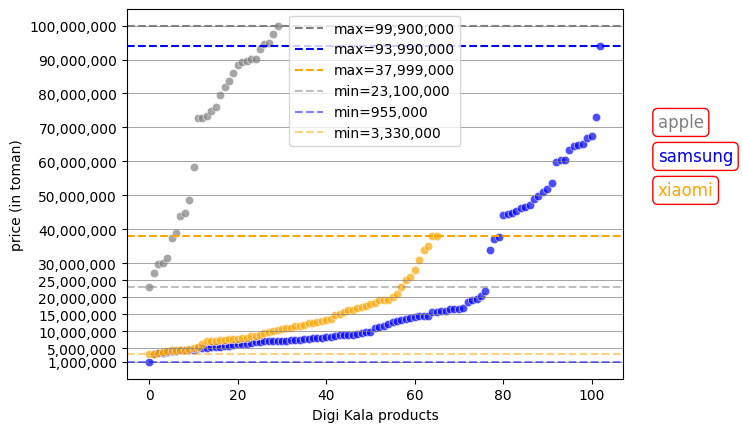

In [8]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 25_000_000,30_000_000,40_000_000,50_000_000,60_000_000,70_000_000,80_000_000,90_000_000,100_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')
plt.xlabel('Digi Kala products')

plt.text(115, 70_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(115, 60_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(115, 50_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = dg_kala_apple_df_r[dg_kala_apple_df_r["price"] == dg_kala_apple_df_r["price"].max()]["price"].values[0]
samsung_max_price = dg_kala_samsung_df_r[dg_kala_samsung_df_r["price"] == dg_kala_samsung_df_r["price"].max()]["price"].values[0]
xiaomi_max_price = dg_kala_xiaomi_df_r[dg_kala_xiaomi_df_r["price"] == dg_kala_xiaomi_df_r["price"].max()]["price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = dg_kala_apple_df_r[dg_kala_apple_df_r["price"] == dg_kala_apple_df_r["price"].min()]["price"].values[0]
samsung_min_price = dg_kala_samsung_df_r[dg_kala_samsung_df_r["price"] == dg_kala_samsung_df_r["price"].min()]["price"].values[0]
xiaomi_min_price = dg_kala_xiaomi_df_r[dg_kala_xiaomi_df_r["price"] == dg_kala_xiaomi_df_r["price"].min()]["price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}', alpha=0.5)
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}', alpha=0.5)
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}', alpha=0.5)

# ploting all datas
sns.scatterplot(x=sorted_dg_kala_apple_df.index,y='price',data=sorted_dg_kala_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_dg_kala_samsung_df.index,y='price',data=sorted_dg_kala_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_dg_kala_xiaomi_df.index,y='price',data=sorted_dg_kala_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

## Gooshi.onlie Prices

sort df in ascending format

In [10]:
sorted_gooshi_online_apple_df = gooshi_online_apple_df_r.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_gooshi_online_samsung_df = gooshi_online_samsung_df_r.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_gooshi_online_xiaomi_df = gooshi_online_xiaomi_df_r.sort_values(by='price', ascending=True).reset_index(drop=True)

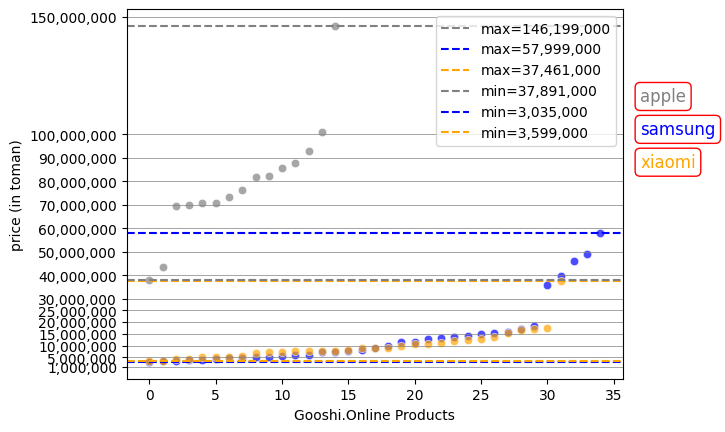

In [11]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')
plt.xlabel('Gooshi.Online Products')

plt.text(37, 114_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(37, 100_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(37, 86_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = gooshi_online_apple_df_r[gooshi_online_apple_df_r["price"] == gooshi_online_apple_df_r["price"].max()]["price"].values[0]
samsung_max_price = gooshi_online_samsung_df_r[gooshi_online_samsung_df_r["price"] == gooshi_online_samsung_df_r["price"].max()]["price"].values[0]
xiaomi_max_price = gooshi_online_xiaomi_df_r[gooshi_online_xiaomi_df_r["price"] == gooshi_online_xiaomi_df_r["price"].max()]["price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = gooshi_online_apple_df_r[gooshi_online_apple_df_r["price"] == gooshi_online_apple_df_r["price"].min()]["price"].values[0]
samsung_min_price = gooshi_online_samsung_df_r[gooshi_online_samsung_df_r["price"] == gooshi_online_samsung_df_r["price"].min()]["price"].values[0]
xiaomi_min_price = gooshi_online_xiaomi_df_r[gooshi_online_xiaomi_df_r["price"] == gooshi_online_xiaomi_df_r["price"].min()]["price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}')
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}')
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}')


# ploting all datas
sns.scatterplot(x=sorted_gooshi_online_apple_df.index,y='price',data=sorted_gooshi_online_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_gooshi_online_samsung_df.index,y='price',data=sorted_gooshi_online_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_gooshi_online_xiaomi_df.index,y='price',data=sorted_gooshi_online_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

## Meghdad IT

sort df in ascending format

In [12]:
sorted_meghdadit_apple_df = meghdadit_apple_df_r.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_meghdadit_samsung_df = meghdadit_samsung_df_r.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_meghdadit_xiaomi_df = meghdadit_xiaomi_df_r.sort_values(by='Price', ascending=True).reset_index(drop=True)

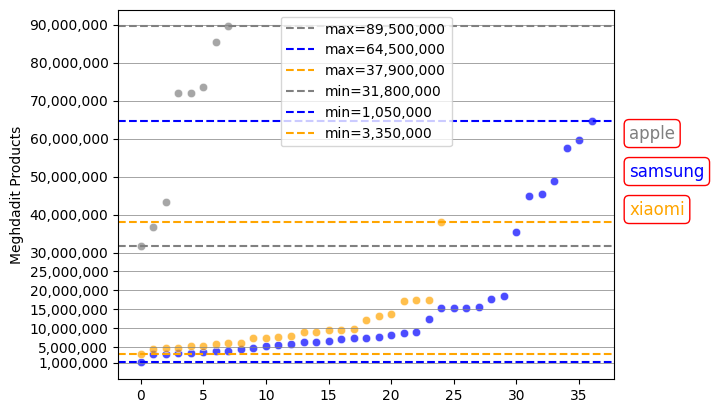

In [13]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')
plt.ylabel('Meghdadit Products')

plt.text(39, 60_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(39, 50_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(39, 40_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = meghdadit_apple_df_r[meghdadit_apple_df_r["Price"] == meghdadit_apple_df_r["Price"].max()]["Price"].values[0]
samsung_max_price = meghdadit_samsung_df_r[meghdadit_samsung_df_r["Price"] == meghdadit_samsung_df_r["Price"].max()]["Price"].values[0]
xiaomi_max_price = meghdadit_xiaomi_df_r[meghdadit_xiaomi_df_r["Price"] == meghdadit_xiaomi_df_r["Price"].max()]["Price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = meghdadit_apple_df_r[meghdadit_apple_df_r["Price"] == meghdadit_apple_df_r["Price"].min()]["Price"].values[0]
samsung_min_price = meghdadit_samsung_df_r[meghdadit_samsung_df_r["Price"] == meghdadit_samsung_df_r["Price"].min()]["Price"].values[0]
xiaomi_min_price = meghdadit_xiaomi_df_r[meghdadit_xiaomi_df_r["Price"] == meghdadit_xiaomi_df_r["Price"].min()]["Price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}')
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}')
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}')


# ploting all datas
sns.scatterplot(x=sorted_meghdadit_apple_df.index,y='Price',data=sorted_meghdadit_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_meghdadit_samsung_df.index,y='Price',data=sorted_meghdadit_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_meghdadit_xiaomi_df.index,y='Price',data=sorted_meghdadit_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

## Technolife

sort df in ascending format

In [14]:
sorted_technolife_apple_df = technolife_apple_df_r.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_technolife_samsung_df = technolife_samsung_df_r.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_technolife_xiaomi_df = technolife_xiaomi_df_r.sort_values(by='Price', ascending=True).reset_index(drop=True)

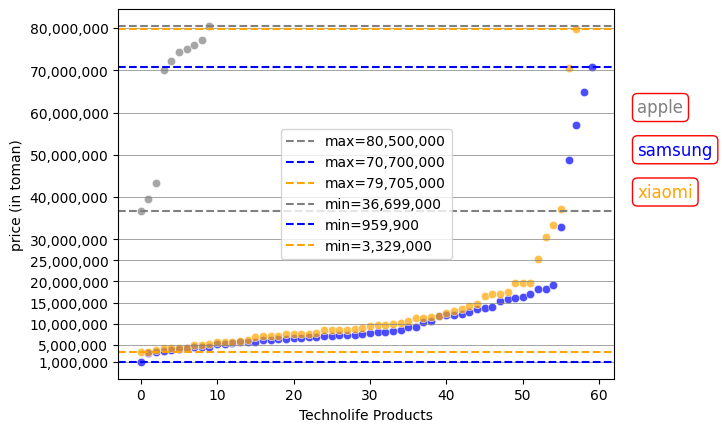

In [17]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')
plt.xlabel('Technolife Products')

plt.text(65, 60_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(65, 50_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(65, 40_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = technolife_apple_df_r[technolife_apple_df_r["Price"] == technolife_apple_df_r["Price"].max()]["Price"].values[0]
samsung_max_price = technolife_samsung_df_r[technolife_samsung_df_r["Price"] == technolife_samsung_df_r["Price"].max()]["Price"].values[0]
xiaomi_max_price = technolife_xiaomi_df_r[technolife_xiaomi_df_r["Price"] == technolife_xiaomi_df_r["Price"].max()]["Price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = technolife_apple_df_r[technolife_apple_df_r["Price"] == technolife_apple_df_r["Price"].min()]["Price"].values[0]
samsung_min_price = technolife_samsung_df_r[technolife_samsung_df_r["Price"] == technolife_samsung_df_r["Price"].min()]["Price"].values[0]
xiaomi_min_price = technolife_xiaomi_df_r[technolife_xiaomi_df_r["Price"] == technolife_xiaomi_df_r["Price"].min()]["Price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}')
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}')
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}')


# ploting all datas
sns.scatterplot(x=sorted_technolife_apple_df.index,y='Price',data=sorted_technolife_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_technolife_samsung_df.index,y='Price',data=sorted_technolife_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_technolife_xiaomi_df.index,y='Price',data=sorted_technolife_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

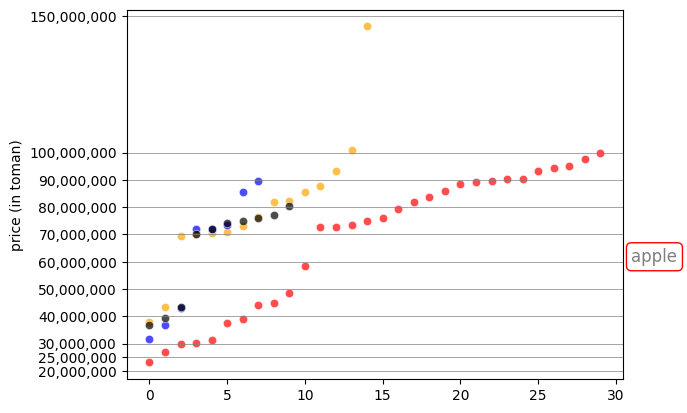

In [24]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')

plt.text(31, 60_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# ploting all datas
sns.scatterplot(x=sorted_dg_kala_apple_df.index,y='price',data=sorted_dg_kala_apple_df, color="red", alpha=0.7)
sns.scatterplot(x=sorted_gooshi_online_apple_df.index,y='price',data=sorted_gooshi_online_apple_df, color="orange", alpha=0.7)
sns.scatterplot(x=sorted_meghdadit_apple_df.index,y='Price',data=sorted_meghdadit_apple_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_technolife_apple_df.index,y='Price',data=sorted_technolife_apple_df, color="black", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

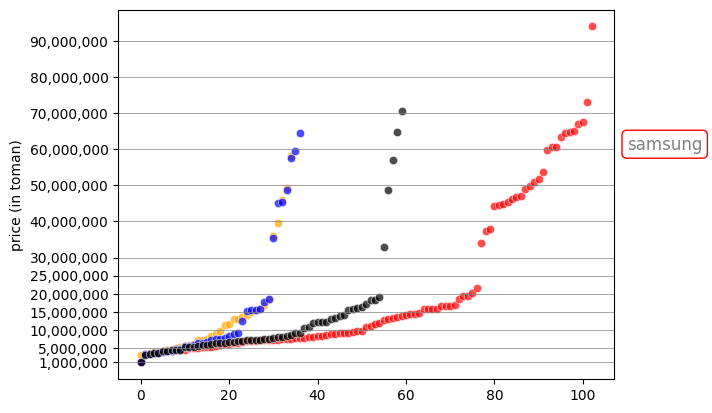

In [26]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')

plt.text(110, 60_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# ploting all datas
sns.scatterplot(x=sorted_dg_kala_samsung_df.index,y='price',data=sorted_dg_kala_samsung_df, color="red", alpha=0.7)
sns.scatterplot(x=sorted_gooshi_online_samsung_df.index,y='price',data=sorted_gooshi_online_samsung_df, color="orange", alpha=0.7)
sns.scatterplot(x=sorted_meghdadit_samsung_df.index,y='Price',data=sorted_meghdadit_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_technolife_samsung_df.index,y='Price',data=sorted_technolife_samsung_df, color="black", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

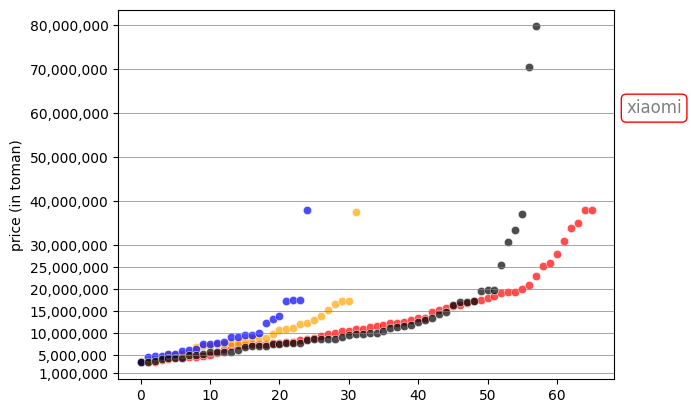

In [31]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')

plt.text(70, 60_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# ploting all datas
sns.scatterplot(x=sorted_dg_kala_xiaomi_df.index,y='price',data=sorted_dg_kala_xiaomi_df, color="red", alpha=0.7)
sns.scatterplot(x=sorted_gooshi_online_xiaomi_df.index,y='price',data=sorted_gooshi_online_xiaomi_df, color="orange", alpha=0.7)
sns.scatterplot(x=sorted_meghdadit_xiaomi_df.index,y='Price',data=sorted_meghdadit_xiaomi_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_technolife_xiaomi_df.index,y='Price',data=sorted_technolife_xiaomi_df, color="black", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

## Average Off digikala gives to each brand

In [46]:
dg_apple_off = dg_kala_apple_df_r[dg_kala_apple_df_r["off_price"] != "NAN"][["off_price", "price"]]
dg_apple_off["price"] = dg_apple_off["price"].apply(int)
dg_apple_off["off_price"] = dg_apple_off["off_price"].apply(int)


dg_apple_off["off_percentage"] = ((dg_apple_off["price"] - dg_apple_off["off_price"]) / dg_apple_off["price"]) * 100
print(f'min off: {dg_apple_off["off_percentage"].min()}')
print(f'average off: {dg_apple_off["off_percentage"].mean()}')
print(f'max off: {dg_apple_off["off_percentage"].max()}')

min off: 2.0
average off: 5.405595244296856
max off: 14.200477326968974


In [43]:
dg_samsung_off = dg_kala_samsung_df_r[dg_kala_samsung_df_r["off_price"] != "NAN"][["off_price", "price"]]
dg_samsung_off["price"] = dg_samsung_off["price"].apply(int)
dg_samsung_off["off_price"] = dg_samsung_off["off_price"].apply(int)


dg_samsung_off["off_percentage"] = ((dg_samsung_off["price"] - dg_samsung_off["off_price"]) / dg_samsung_off["price"]) * 100
print(f'min off: {dg_samsung_off["off_percentage"].min()}')
print(f'average off: {dg_samsung_off["off_percentage"].mean()}')
print(f'max off: {dg_samsung_off["off_percentage"].max()}')

min off: 2.127885945313331
average off: 5.940832040479247
max off: 14.225053078556263


In [49]:
dg_xiaomi_off = dg_kala_xiaomi_df_r[dg_kala_xiaomi_df_r["off_price"] != "NAN"][["off_price", "price"]]
dg_xiaomi_off["price"] = dg_xiaomi_off["price"].apply(int)
dg_xiaomi_off["off_price"] = dg_xiaomi_off["off_price"].apply(int)


dg_xiaomi_off["off_percentage"] = ((dg_xiaomi_off["price"] - dg_xiaomi_off["off_price"]) / dg_xiaomi_off["price"]) * 100

print(f'min off: {dg_xiaomi_off["off_percentage"].min()}')
print(f'average off: {dg_xiaomi_off["off_percentage"].mean()}')
print(f'max off: {dg_xiaomi_off["off_percentage"].max()}')

min off: 2.029220779220779
average off: 5.252299783549783
max off: 12.142857142857142
